In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score



In [ ]:
# pip install factor_analyzer

In [ ]:
boston = pd.read_csv('housing.csv')
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Factor Analysis

In [ ]:
correlation = boston.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Bartlett Sphericity

In [ ]:
_,p = calculate_bartlett_sphericity(boston)
print("Bartlett Sphericity Test")
print("p value : ",p)

Bartlett Sphericity Test
p value :  0.0


### The p value < 0.5 . It means good then we can go to the next step

### Uji KMO

In [ ]:
kmo_all,kmo_model = calculate_kmo(boston)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.8532156075257024


### The KMO score is greater than 0.5 , then factor analysis is feasible

### Get eigenvalues

In [ ]:
fa = FactorAnalyzer()
fa.fit(boston)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
ev, v = fa.get_eigenvalues()
ev

array([6.54598958, 1.64953191, 1.34890592, 0.88653987, 0.85089944,
       0.66001077, 0.5354108 , 0.40307658, 0.27726358, 0.25225744,
       0.21279025, 0.1829875 , 0.1340097 , 0.06032666])

In [ ]:
w, v = np.linalg.eig(correlation.values)

print("Printing the Eigen values of the given square array:\n", w)

Printing the Eigen values of the given square array:
 [6.54598958 1.64953191 1.34890592 0.88653987 0.85089944 0.66001077
 0.5354108  0.40307658 0.06032666 0.1340097  0.27726358 0.25225744
 0.1829875  0.21279025]


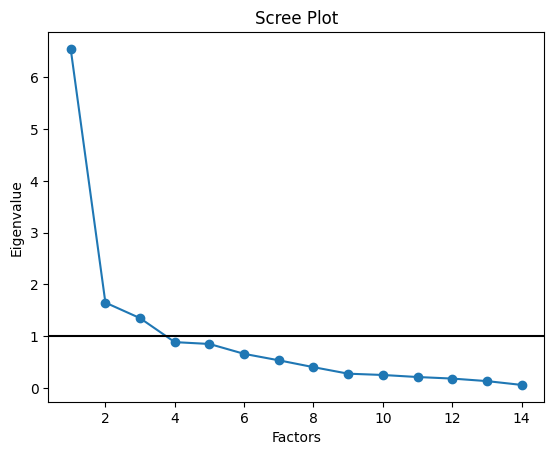

In [ ]:
plt.scatter(range(1,boston.shape[1]+1),ev)
plt.plot(range(1,boston.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

### Factor Latent

In [ ]:
fa = FactorAnalyzer(n_factors=3)
fa.fit(boston)
boston_fa = pd.DataFrame(fa.loadings_,index=boston.columns)
boston_fa.columns =['faktor 1','faktor 2','faktor 3']
boston_fa

,faktor 1,faktor 2,faktor 3
CRIM,0.006814,0.627520,-0.037476
ZN,-0.686474,0.154093,0.214297
INDUS,0.579234,0.291657,-0.129181
CHAS,0.227731,-0.052495,0.227017
NOX,0.695030,0.287193,0.019273
RM,-0.148555,0.218720,0.814657
AGE,0.782669,0.049520,-0.056583
DIS,-0.914219,-0.097696,-0.131150
RAD,-0.024721,1.068853,0.181591
TAX,0.067966,0.944262,0.065240


<Axes: >

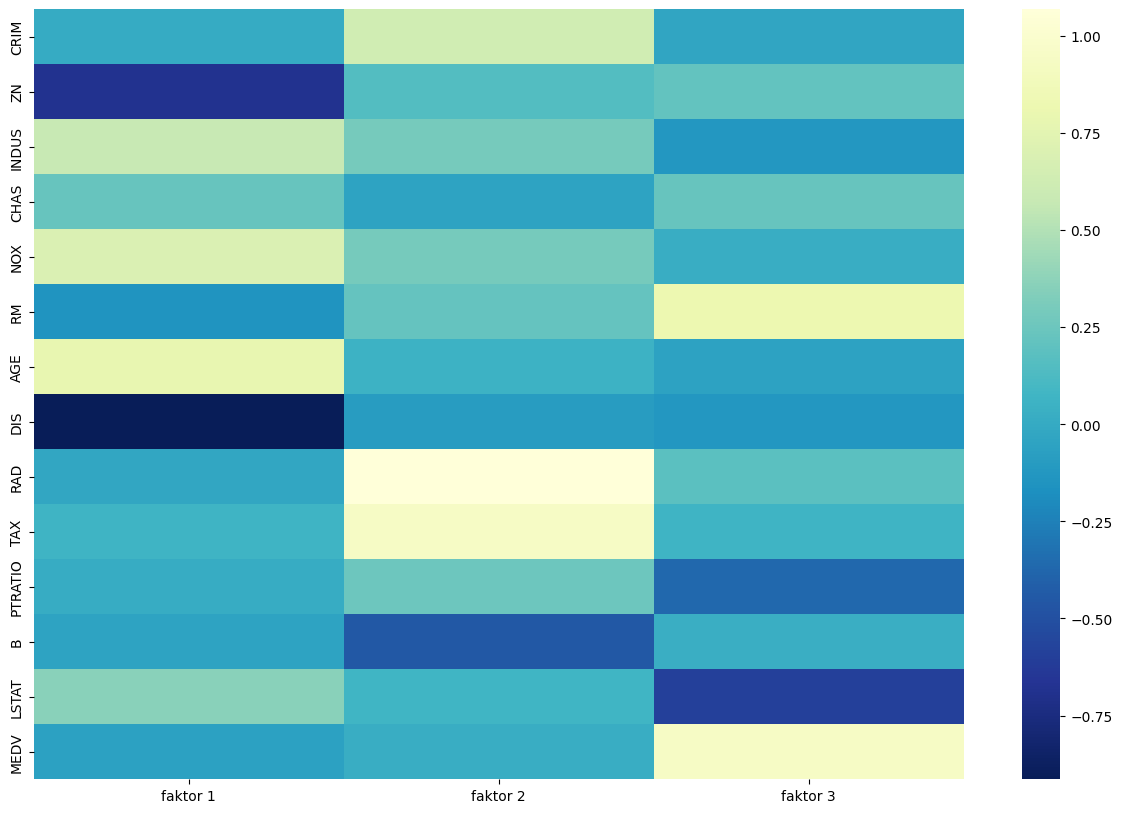

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(boston_fa, cmap="YlGnBu_r")

### Explained Variance

In [ ]:
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2
Variance,2.955135,2.953383,2.212301
Proportional Var,0.211081,0.210956,0.158021
Cumulative Var,0.211081,0.422037,0.580058


# **Data Preprocessing**

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Theres no missing values in dataset

In [ ]:
boston.duplicated().sum()

0

### Theres no duplicates values in dataset

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

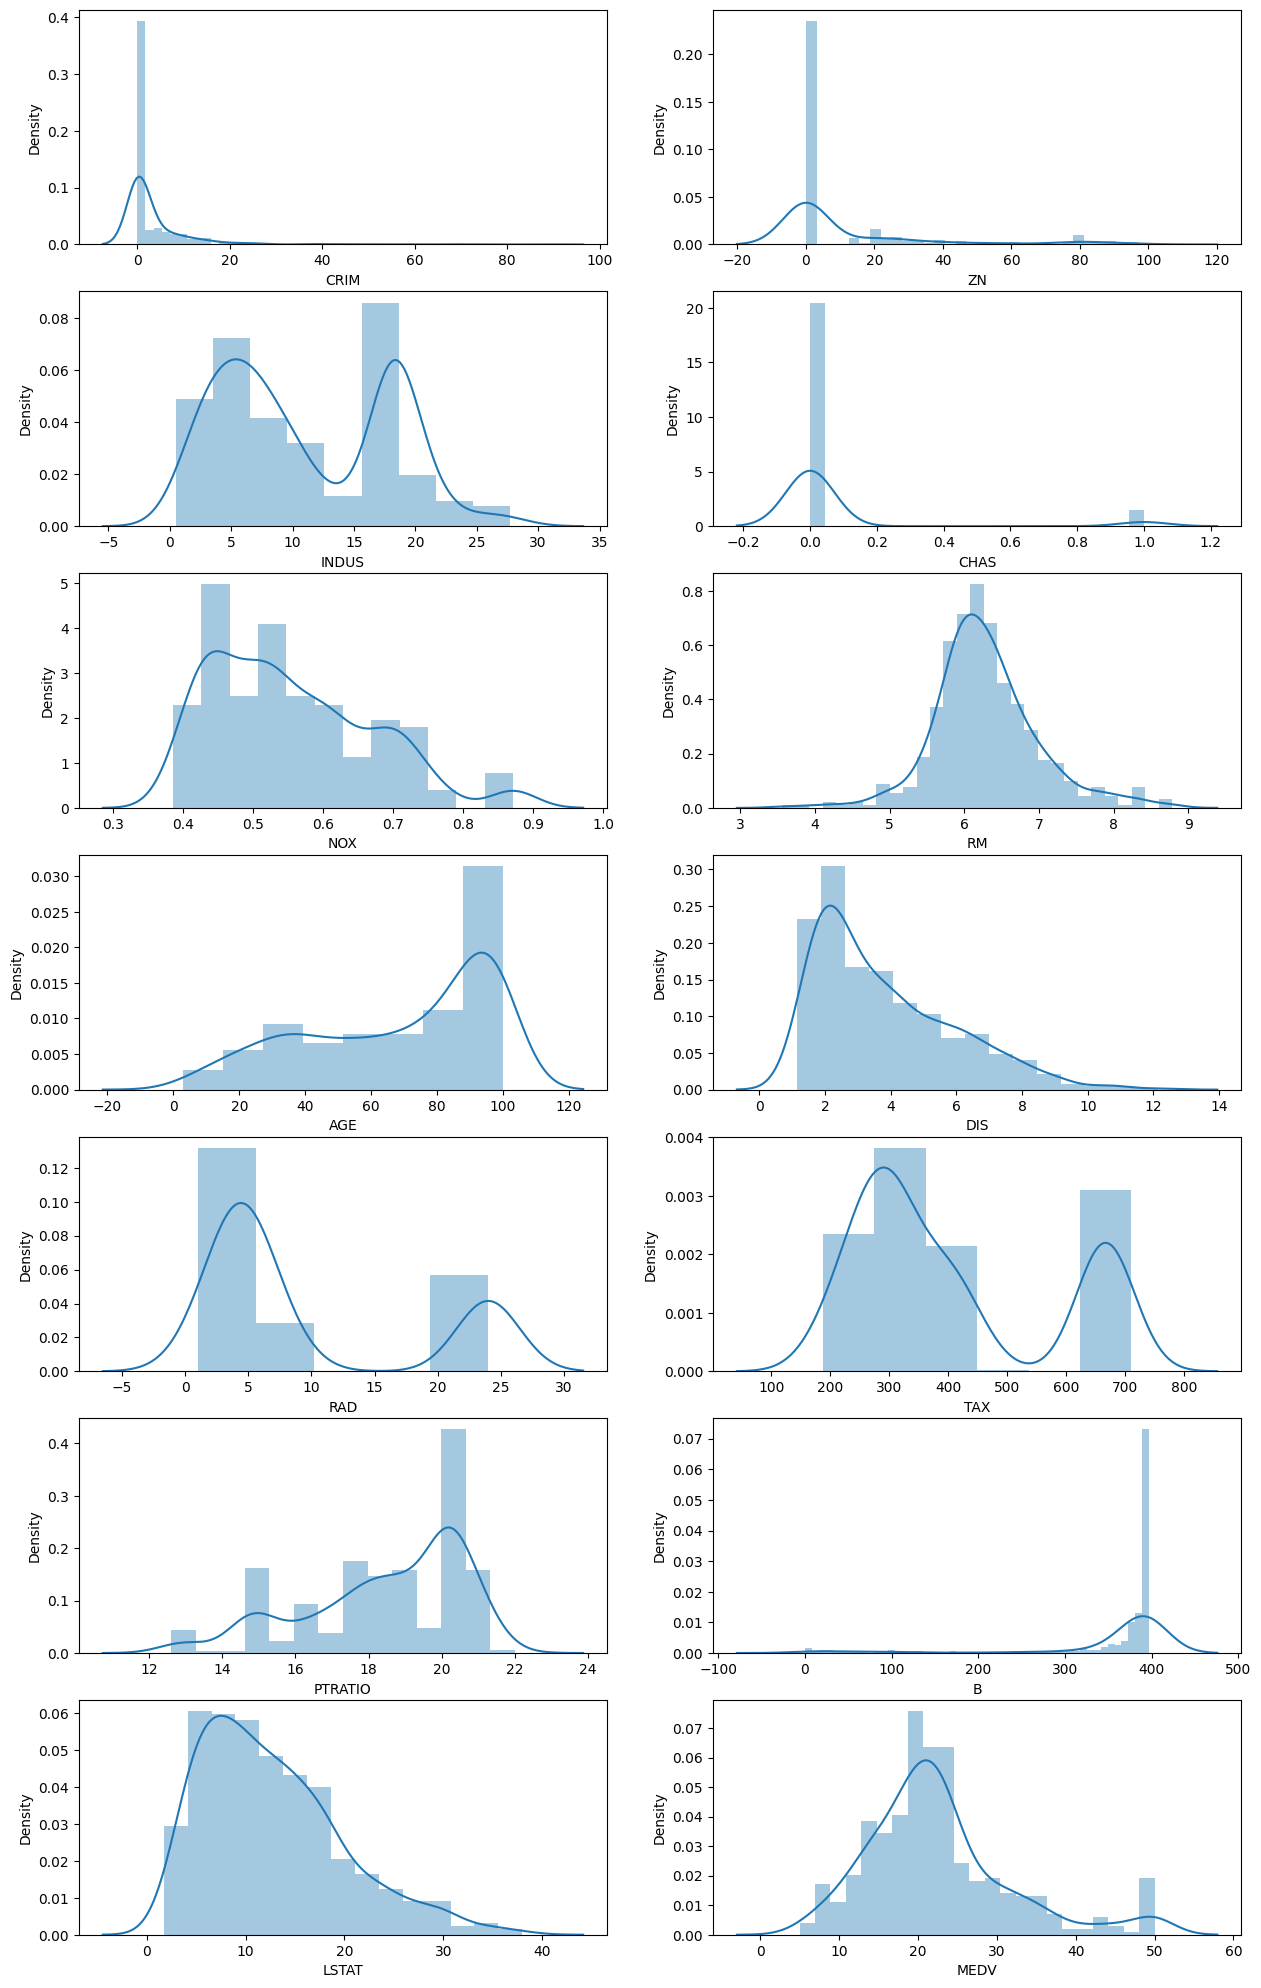

In [ ]:
pos = 1
fig = plt.figure(figsize=(15,25))
for i in boston.columns:
  ax = fig.add_subplot(7,2,pos)
  pos = pos + 1
  sns.distplot(boston[i], ax=ax)

### Nothing else is distributed normally except MEDV and RM.

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## VIF

In [ ]:
vifboston = []
for i in boston.columns:
    X = boston.drop(i,axis=1)
    y = boston[i]
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifboston.append((i,vif))

vifboston = pd.DataFrame(vifboston,columns=['Features','Variance Inflation Factor'])
vifboston.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
3,CHAS,1.095223
11,B,1.381463
0,CRIM,1.831537
10,PTRATIO,1.993016
5,RM,2.260374
1,ZN,2.352186
6,AGE,3.100843
12,LSTAT,3.581585
13,MEDV,3.855684
2,INDUS,3.992503


<Axes: >

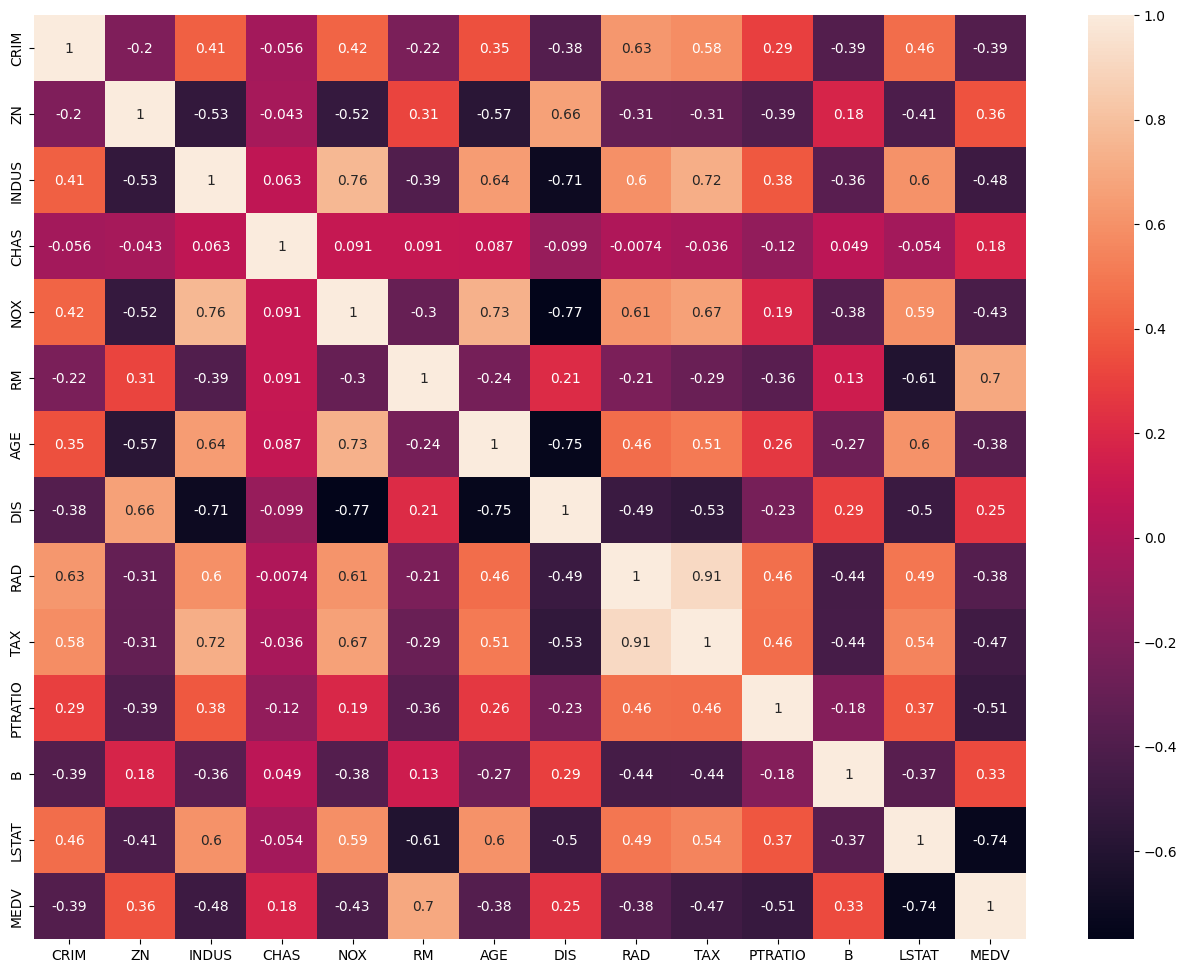

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(boston.corr(), annot = True)


### 1.   RAD and TAX are highly correlated each other
### 2.   To fit in linear regression model, we can select feature which have a high/strong correlation with MEDV. From these, we can see that RM has a strong positive correlation with MEDV (0,7) and LSTAT has a strong negative correlation with MEDV (-0,74)




## Standardization Data

In [ ]:


feats = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:

new_boston = pd.DataFrame(data = X_std, columns = feats)
new_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,RAD,TAX,AGE,DIS,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# **PCA Process**

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=13)
pca.fit(X_std)
pcs = pca.transform(X_std)


pdf = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
pdf['MEDV'] = y
pdf.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022,34.7


In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]
Explained variance ratio: [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


In [ ]:
cumsum_variance = np.cumsum(pca.explained_variance_ratio_*100)
cumsum_variance

array([ 47.12960636,  58.1547996 ,  67.7133894 ,  74.310121  ,
        80.73178205,  85.78876032,  89.90688406,  92.95378648,
        95.08411979,  96.7782569 ,  98.20913665,  99.51146723,
       100.        ])

<BarContainer object of 13 artists>

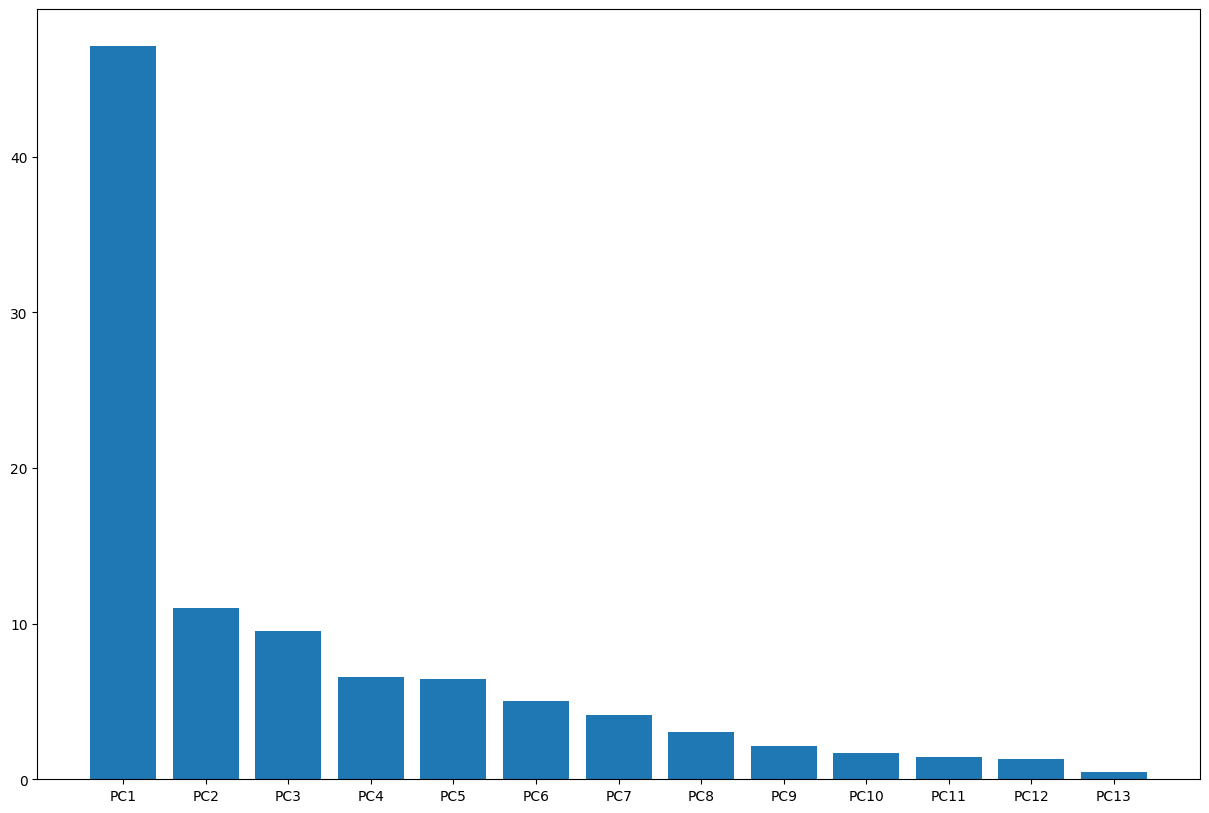

In [ ]:


fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], pca.explained_variance_ratio_ * 100)

In [ ]:
# min 80% sudah mencover info original

pca = PCA(n_components=6)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
X_std_pca['MEDV'] = y
X_std_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,36.2


# **Regression Model**

### Due to the target of dataset is continuous type, we can use Linear Regression as a model to evaluate datasets with or without PCA

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split

feature = boston.drop(columns = 'MEDV')
target = boston[['MEDV']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
vifboston = []
for i in boston.columns:
    X = boston.drop(i,axis=1)
    y = boston[i]
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifboston.append((i,vif))

vifboston = pd.DataFrame(vifboston,columns=['Features','Variance Inflation Factor'])
vifboston.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
3,CHAS,1.095223
11,B,1.381463
0,CRIM,1.831537
10,PTRATIO,1.993016
5,RM,2.260374
1,ZN,2.352186
6,AGE,3.100843
12,LSTAT,3.581585
13,MEDV,3.855684
2,INDUS,3.992503


## Split Data

In [ ]:
X_pca = X_std_pca.drop('MEDV', axis=1)
y_pca = X_std_pca['MEDV']

X_train_pca, X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_pca,
                                                test_size = 0.4,
                                                random_state = 42)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_std,y,
                                                test_size = 0.4,
                                                random_state = 42)

In [ ]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca,y_train_pca)

LinearRegression()

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## Predicting

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred_pca=lr_pca.predict(X_test_pca)

# **Evaluation**

In [ ]:
X = X_std_pca.drop('MEDV',axis=1)
y = X_std_pca['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
for i in [X_train,X_test,y_train,y_test]:
    print("Shape of Data is {}".format(i.shape))

Shape of Data is (404, 6)
Shape of Data is (102, 6)
Shape of Data is (404,)
Shape of Data is (102,)


## Modeling without PCA

In [ ]:
# training model on training data and predict also on training
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.6969619967599663 | Root Mean Square Error is : 5.008646934693271


In [ ]:
# training model on training data and predict also on testing
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R2 Score is : 0.7080047139481025 | Root Mean Square Error is : 5.147822421901975


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  26.500075687436716
Mean Absolute Error :  3.538004864551521


## Modeling with PCA

In [ ]:
# training model on training data and predict also on training
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca,y_train_pca)
y_pred = lr_pca.predict(X_train_pca)
r2 = r2_score(y_train_pca,y_pred)
rmse = np.sqrt(mean_squared_error(y_train_pca,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.706918411376129 | Root Mean Square Error is : 5.11377618568804


In [ ]:
# training model on training data and predict also on testing
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca,y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)
r2 = r2_score(y_test_pca,y_pred_pca)
rmse = np.sqrt(mean_squared_error(y_test_pca,y_pred_pca))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.6803594339885964 | Root Mean Square Error is : 4.926931100941515


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_pca, y_pred_pca)
mae = mean_absolute_error(y_test_pca, y_pred_pca)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  24.274650073424773
Mean Absolute Error :  3.25297151751662


## Conclusion :
## In this case to evaluate the model we can use RMSE score on model performance on testing data. When we use PCA, the RMSE score is decreased. It means that the number of features are sufficient and there is a noise. Also using PCA might be a good choice, because the smaller RMSE score, the better it is.

